### On-line measuring of one qubit with MMW and RFL methods
(toy example with no noise)

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom
import math

Function to generate an random $n \times n$ desity matrix we want to indentify (consider unknown)

In our toy example consider $2 \times 2$ desity matrix:
\begin{align}
  \rho = 
        \left(
        \begin{array}{ccccc}
            \rho_{00}   &   \rho_{01}  \\
            \rho_{01}^*  &  \rho_{11} \\
        \end{array}
        \right)
\end{align}

In [2]:
ρ0 = rand_dm(2)
print(ρ0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.96680861+0.j         0.03941073-0.17156586j]
 [0.03941073+0.17156586j 0.03319139+0.j        ]]


We will use fidelity to check the similarity of quantum states
$F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2$

In [3]:
ρ_exited = Qobj([[1, 0], [0, 0]])
fidelity(ρ0, ρ_exited)

0.9832642687250396

Any state of a qubit $|\psi\rangle$ and any corresponding density matrix $\rho =  |\psi\rangle \langle \psi|$ could be visually expressed as an vector on the Bloch sphere

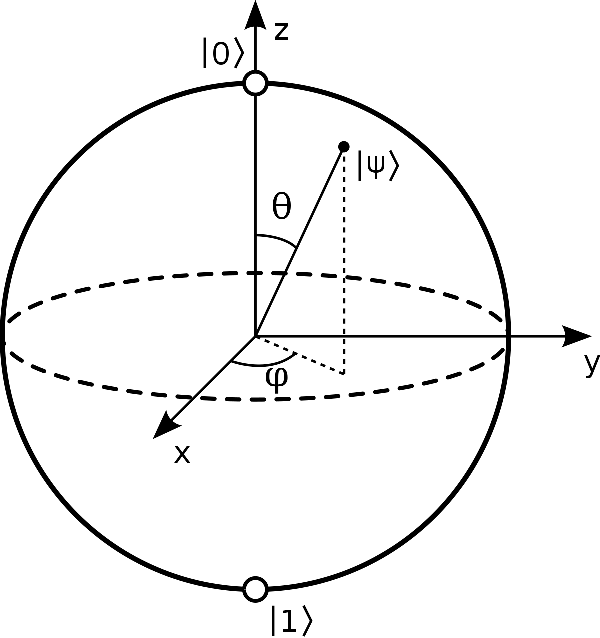

To perform measurements we need sets of POVM measurement operators $\{E_i\}$ 
such that $\sum_i E_i = I$.

To meausure in computational basis: $\{ |0\rangle, |1\rangle \}$ we need
\begin{align}
  E_0 = |0\rangle \langle 0|=
          \left(
        \begin{array}{ccccc}
            0  \\
            1  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            0   &   1  \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            0   &  0 \\
            0   &  1 \\
        \end{array}
        \right),
\quad
  E_1 = |1\rangle \langle 1|=
          \left(
        \begin{array}{ccccc}
            1  \\
            0  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            1   &   0 \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1   &  0 \\
            0   &  0 \\
        \end{array}
        \right)
\end{align}

In [4]:
Ez_plus = E0 = Qobj([[1, 0], [0, 0]])
Ez_minus = E1 = Qobj([[0, 0], [0, 1]])

To measure in $\{X\}$ basis $\{|+ \rangle = \frac{|0\rangle + |1\rangle }{\sqrt{2}}, 
  |- \rangle = \frac{|0\rangle - |1\rangle }{\sqrt{2}} \}$ we need:

\begin{align}
  E_+ = |+\rangle \langle +|=
          \left(
        \begin{array}{ccccc}
            1/\sqrt{2}  \\
            1/\sqrt{2}  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            1/\sqrt{2}   &   1/\sqrt{2} \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1/2   &  1/2 \\
            1/2   &  1/2 \\
        \end{array}
        \right), \quad
        E_{-} = |-\rangle \langle -|= 
        \left(
        \begin{array}{ccccc}
            1/2   &  -1/2 \\
            -1/2   &  1/2 \\
        \end{array}
        \right)    
\end{align}

In [5]:
Ex_plus = Qobj([[1/2, 1/2], [1/2, 1/2]])
Ex_minus = Qobj([[1/2, -1/2], [-1/2, 1/2]])

To measure in $\{Y\}$ basis $\{|y+ \rangle = \frac{|0\rangle + i|1\rangle }{\sqrt{2}}, 
  |y- \rangle = \frac{|0\rangle - i|1\rangle }{\sqrt{2}} \}$ we need:
  
 \begin{align}
  E_y+ = |y+\rangle \langle y+|=
          \left(
        \begin{array}{ccccc}
            i/\sqrt{2}  \\
            1/\sqrt{2}  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            -i/\sqrt{2}   &   1/\sqrt{2} \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1/2   &  i/2 \\
            -i/2   &  1/2 \\
        \end{array}
        \right), \quad
        E_{y-} = |y-\rangle \langle y-|= 
        \left(
        \begin{array}{ccccc}
            1/2   &  -i/2 \\
            i/2   &  1/2 \\
        \end{array}
        \right)    
\end{align}

In [6]:
Ey_plus = Qobj([[1/2, 1j/2], [-1j/2, 1/2]])
Ey_minus = Qobj([[1/2, -1j/2], [1j/2, 1/2]])

Probability to obtain "1" when measure the observable $E_m$ is 

$p(m) = \operatorname{Tr}(E_m \rho)$

In [7]:
p0 = abs(np.trace(E0 * ρ0))
p0

0.9668086124601458

We can generate sequence that simulate measurements $Y$ with outcomes $\{0,1\}$ of the particular observable:

In [8]:
D = bernoulli(p0)
Y_test = D.rvs(100)
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

To perform quantum state tomography (restore the quantum state $\rho$ from measurements $Y$ we can use the following algorithms:

### Matrix Multiplicative Weights (MMW) algorithm [Tsuda et al., 2005]
as described in Online Learning of Quantum States by Elad Hazan and others

1. Set initial guess for $\rho$ as $\omega_1 := 2^{-n} I$
for one qubit it is just 

\begin{align}
    \omega_1 := \begin{pmatrix}
        1/2 & 0 \\
        0 & 1/2 \\
    \end{pmatrix}
\end{align}

In [9]:
𝜔1 = Qobj([[1/2, 0], [0, 1/2]])

2. Update $\omega_{t+1}$:

$ \omega_{t+1} := \frac{\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_\tau)}{\operatorname{Tr}(\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_\tau))}
$

where $\eta$ and $L$ are some regulirasation coefficients, $\eta$ could be choosen
$\eta = \sqrt{\frac{(\operatorname{log}2) n}{4T}}
$

#### Define auxilary functions

Function for the gradient:
$ \nabla_t (\omega_t) := 2\left({\operatorname{Tr}(E_t \omega_t) - Y_t} \right) E_t$ 

In [10]:
def grd(𝜔, E, Y):
    return 2 * (np.trace(E * 𝜔) - Y) * E

grd(𝜔1, E0, 1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  0.]]

Function to update $\omega_{t+1}$ from the $\omega_{t}$

In [11]:
def mmw_next_omega(𝜔, E, Y):
    η = 0.05
    s = - sum([ grd(𝜔[_], E[_], Y[_]) for _ in range(len(𝜔)) ]) * η
    e = s.expm() 
    return e/e.tr()  

In [12]:
mmw_next_omega([𝜔1], [E0], [0])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.4875026 0.       ]
 [0.        0.5124974]]

#### Simulate measurements

In [13]:
ρ0 = rand_dm(2)
#ρ0 = Qobj([[1, 0], [0, 0]])

n = 100 # number of measurements for each operator

Yz = bernoulli(abs(np.trace(E0 * ρ0))).rvs(n)
Yx = bernoulli(abs(np.trace(Ex_plus * ρ0))).rvs(n)
Yy = bernoulli(abs(np.trace(Ey_plus * ρ0))).rvs(n)
ρ0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.74691973+0.j         0.31274521+0.16483767j]
 [0.31274521-0.16483767j 0.25308027+0.j        ]]

In [14]:
# Prepare measurement series

Y = []
E = []

for i in range(n):
    Y.append(Yz[i])
    E.append(Ez_plus)
    Y.append(Yx[i])
    E.append(Ex_plus)
    Y.append(Yy[i])
    E.append(Ey_plus)

len(Y)

300

#### Main loop of the MMW algorithm

In [15]:
𝜔 = []
F = []
𝜔.append(𝜔1)
for i in range(len(Y)):
    step = len(𝜔)
    𝜔_next = mmw_next_omega(𝜔, E[:step], Y[:step])
    𝜔.append(𝜔_next)
    F.append(fidelity(ρ0, 𝜔_next))  

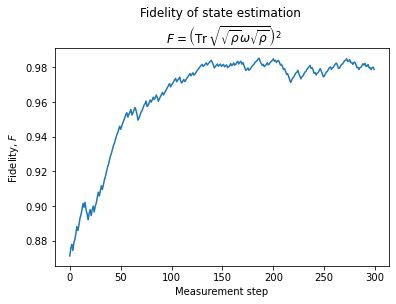

In [16]:
plt.plot(F)
plt.title("Fidelity of state estimation \n " + r"$F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2$")
plt.xlabel("Measurement step")
plt.ylabel(r"Fidelity, $F$")
plt.show()

Compare "exact" state $\rho_0$ and estimated state $\omega$

In [41]:
ρ_MMW = 𝜔[-1]
ρ_MMW

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.6188789 +0.j         0.31002494+0.05536119j]
 [0.31002494-0.05536119j 0.3811211 +0.j        ]]

In [18]:
ρ0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.74691973+0.j         0.31274521+0.16483767j]
 [0.31274521-0.16483767j 0.25308027+0.j        ]]

In [42]:
fidelity(ρ0, ρ_MMW)

0.9787798112457468

### Regularized Follow-the-Leader algorithm 
from the Online Learning of Quantum States by Elad Hazan and others

1. Set $\omega_1 := 2^{-n} I$
for one qubit it is just 

\begin{align}
    \omega_1 := \begin{pmatrix}
        1/2 & 0 \\
        0 & 1/2 \\
    \end{pmatrix}
\end{align}

In [19]:
𝜔1 = Qobj([[1/2, 0], [0, 1/2]])

2. Predict $\omega_{t}$

using the same gradient:
$ \nabla_s (\phi) := 2\left({\operatorname{Tr}(E_s \phi) - Y_s} \right) E_s$ 

update
$ \omega_{t+1} = \operatorname{argmin}_\phi \left\{ \eta \sum_{s=1}^t \operatorname{Tr} (\nabla_s \phi) + \sum_{i=1}^{2^n} \lambda_i(\phi) \log \lambda_i(\phi) \right \}$

We denote the eigen values of these operators $\lambda$

In [20]:
λ = np.linalg.eig(𝜔1)[0]
λ

array([0.5+0.j, 0.5+0.j])

Define auxilary functions

In [21]:
from ncpol2sdpa import generate_variables, SdpRelaxation
from sympy import Matrix, I, eye, re, im, diag, solve, lambdify, log
from scipy.optimize import minimize

In [22]:
def unknown_density_matrix(name, n):
    
    x = generate_variables(name, n ** 2 - 1)
    M = diag(*x[:(n-1)], 1-sum(x[:(n-1)]))
    M /= 2
    x = x[n-1:]
    
    for i in range(n - 1):
        for j in range(i + 1, n):
            M[i, j] = x.pop() + I * x.pop()  
    
    M += M.H
    return M

In [23]:
def symb_grd(𝜙, Ei, Yi):
    
    return 2 * abs(np.trace( Ei.full() @ 𝜙) - Yi) * Ei.full() 

In [24]:
𝜙 = unknown_density_matrix("rho", 2)
𝜙

Matrix([
[          rho0, I*rho1 + rho2],
[-I*rho1 + rho2,      1 - rho0]])

In [25]:
λ = 𝜙.eigenvals()
[log(λi) for λi in list(λ.keys())]

[log(1/2 - sqrt(4*rho0**2 - 4*rho0 + 4*rho1**2 + 4*rho2**2 + 1)/2),
 log(sqrt(4*rho0**2 - 4*rho0 + 4*rho1**2 + 4*rho2**2 + 1)/2 + 1/2)]

In [26]:
symb_grd(𝜙, Ez_plus, 1)

array([[2.0*Abs(1.0*rho0 - 1), 0],
       [0, 0]], dtype=object)

Objective to minimize is $\eta \sum_{s=1}^t \operatorname{Tr} (\nabla_s \phi) + \sum_{i=1}^{2^n} \lambda_i(\phi) \log \lambda_i(\phi)$

In [27]:
𝜂 = math.sqrt(math.log(2)/300)
𝜂

0.0480675628866961

In [28]:
𝜂 = 0.01
s1 = 𝜂 * sum([np.trace(symb_grd(𝜙, E[_], Y[_])) for _ in range(len(Y))])
λ = 𝜙.eigenvals()
s2 = sum([λi * log(λi) for λi in list(λ.keys())])
obj = s1.simplify() + s2.simplify()
obj = re(obj.simplify())

In [29]:
# list of unknowns
x = list(obj.free_symbols)
len(x)
x[0]

rho2

In [30]:
from scipy.optimize import LinearConstraint
#A = np.zeros((1, len(x)))
#A[0,0] = 1.
A = np.identity(len(x))
A
low = [0, 0, 0]
up = [1, 1, 1]

In [31]:
constraint = LinearConstraint(A, lb=low, ub=up)

Lets try to minimize objective

In [32]:
# symbolically get the Jacobian
jac = [obj.diff(_) for _ in x]

f = lambdify(x, obj, 'numpy')
jac = lambdify(x, jac, 'numpy')

# Use the conjugate gradient method in scipy since we have both the Jacobian and Hessian of the objective function
scipy_solution = minimize(
    lambda _: f(*_),
    [0.5, 0.1, 0.1], #np.ones(len(x)),
    constraints=constraint,
    jac=lambda _: np.array(jac(*_)),
)

In [33]:
scipy_solution

     fun: 1.9933499372142673
     jac: array([ 0.00012308, -0.00049496, -0.00228444])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.29477051, 0.07358502, 0.65509244])

In [34]:
if scipy_solution.success:
    solution = dict(zip(x, scipy_solution.x))
    
    rho_reconstructed = np.array(𝜙.subs(solution), dtype=np.complex)
    
else:
    solution = rho_reconstructed = None  

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27516\994699499.py:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rho_reconstructed = np.array(𝜙.subs(solution), dtype=np.complex)


In [39]:
ρ_RFL = Qobj(rho_reconstructed.round(3))
ρ_RFL

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.655+0.j    0.295+0.074j]
 [0.295-0.074j 0.345+0.j   ]]

In [36]:
ρ0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.74691973+0.j         0.31274521+0.16483767j]
 [0.31274521-0.16483767j 0.25308027+0.j        ]]

Now we can compare fidelity achieved by both algoritms

In [40]:
fidelity(ρ0, ρ_RFL)

0.9850796567293341

In [43]:
fidelity(ρ0, ρ_MMW)

0.9787798112457468